Algorithm for drawing random stabilizer state from basis:

1)
Compute cumulative prob. dist $F(x)$ from $f(x)=|\psi(x)|^2$.

2)
Choose $p\in(0, 1)$ from a uniform dist.

3)
Find $x$ s.t
$$ F(x-1) < p < F(x) $$
using binary search.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections
%run StateVectorSimulator.py
%run MatrixOperatorSimulator.py
%run TableauSimulator.py
%run GraphStateSimulator.py

In [50]:
NumBitSrings = 10000

<IPython.core.display.Javascript object>


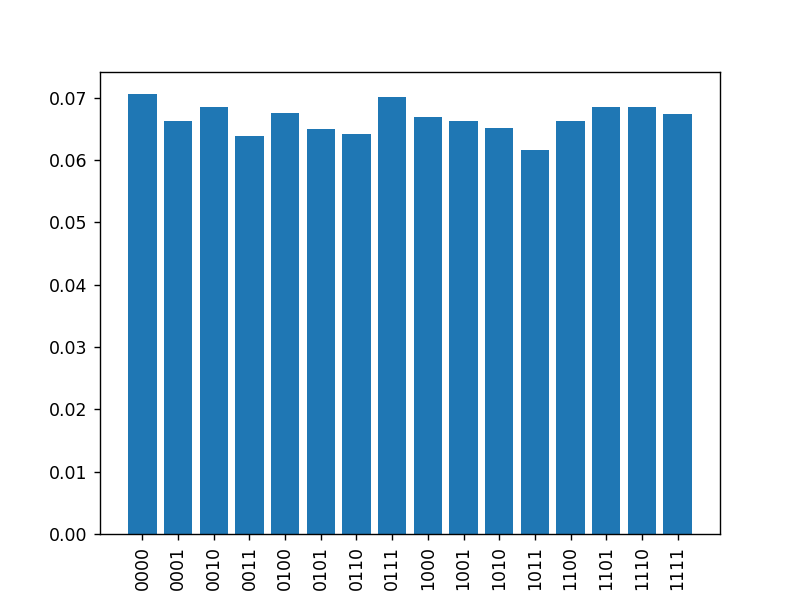

In [51]:
C1 = MO_Circuit('4_bits.txt')
C1.simulate()

state = C1.measure()
basis = []
N = int(np.log2(len(state)))
eps = 1e-6

for i in range(N**2):
    if abs(state[i]) > eps:
        basis.append(('{0:0>' + str(int(N)) + r'b}').format(i))

draws = np.random.randint(0, len(basis), size = NumBitSrings)
hist = np.histogram(draws, bins = len(basis), density=True)[0]
x = np.arange(len(basis))

plt.figure()
plt.bar(x, hist)
plt.xticks(x, basis, fontsize=10, rotation=90)
plt.show()

<IPython.core.display.Javascript object>


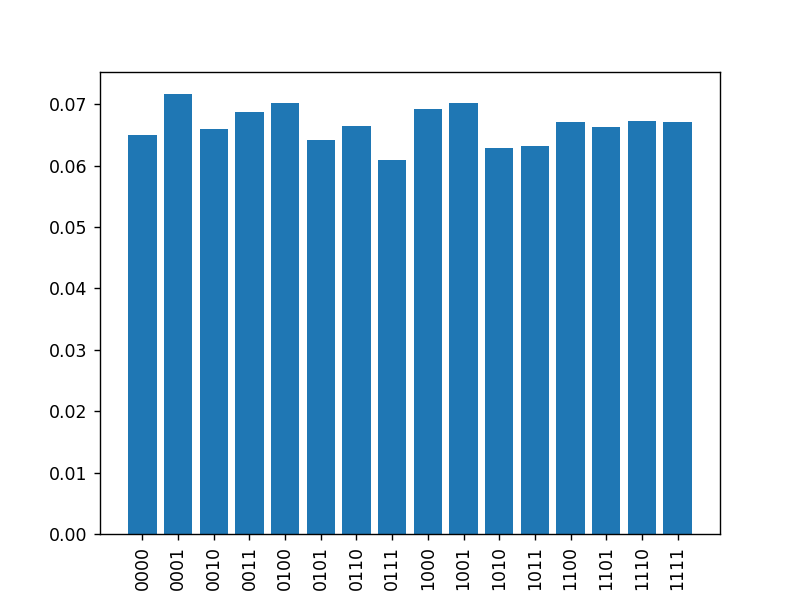

In [52]:
C2 = SV_Circuit('4_bits.txt')
C2.simulate()
state = C2.measure()
basis = []
N = int(np.log2(len(state)))
eps = 1e-6

for i in range(N**2):
    if abs(state[i]) > eps:
        basis.append(('{0:0>' + str(int(N)) + r'b}').format(i))

draws = np.random.randint(0, len(basis), size = NumBitSrings)
hist = np.histogram(draws, bins = len(basis), density=True)[0]
x = np.arange(len(basis))

plt.figure()
plt.bar(x, hist)
plt.xticks(x, basis, fontsize=10, rotation=90)
plt.show()

<IPython.core.display.Javascript object>


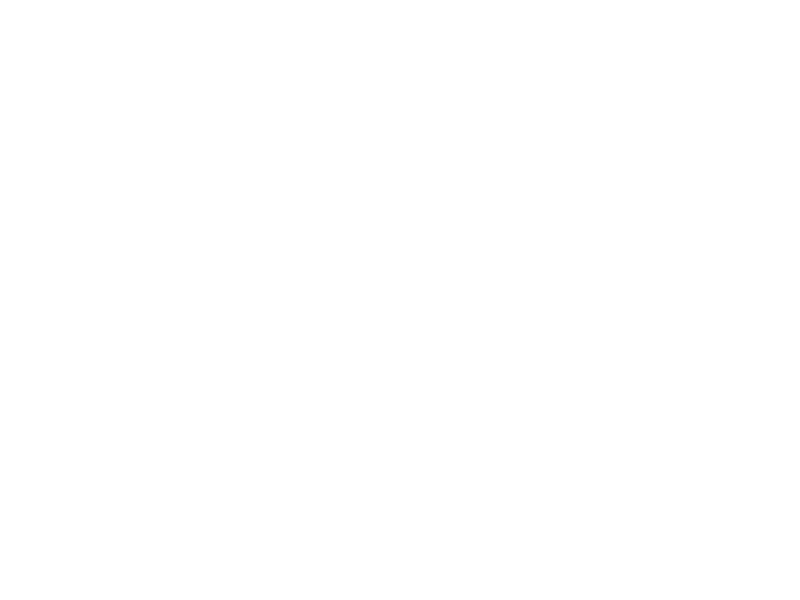

In [53]:
basis = {}

for i in range(NumBitSrings):
    C3 = Tableau_Circuit('4_bits.txt')
    C3.simulate()
    res = np.array2string(C3.measure_system(), separator='')[1:-1]
    
    try:
        basis[res] += 1
    except KeyError:
        basis[res] = 1

keys = np.array(list(basis.keys()))
values = np.array(list(basis.values()))
values = values / np.sum(values)


x = np.arange(len(keys))

plt.figure()
plt.bar(x, values)
plt.xticks(x, keys, fontsize=10, rotation=90)
plt.show()

<IPython.core.display.Javascript object>


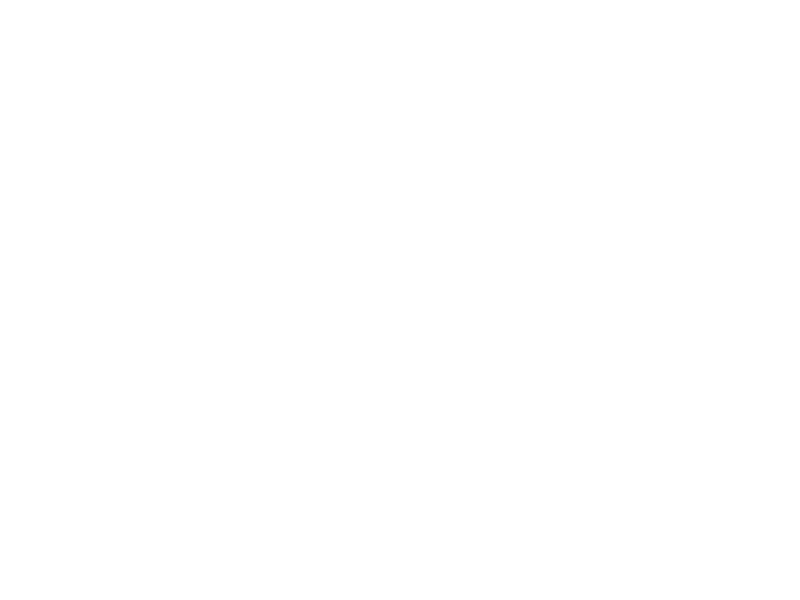

In [54]:
basis = {}

for i in range(NumBitSrings):
    C4 = GS_Circuit('4_bits.txt')
    C4.simulate()
    res = np.array2string(C4.measure_system(), separator='')[1:-1]
    
    try:
        basis[res] += 1
    except KeyError:
        basis[res] = 1

keys = np.array(list(basis.keys()))
values = np.array(list(basis.values()))
values = values / np.sum(values)

x = np.arange(len(keys))

plt.figure()
plt.bar(x, values)
plt.xticks(x, keys, fontsize=10, rotation=90)
plt.show()

In [55]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [56]:
qc = QuantumCircuit(C4.Nqubits)
for gate in C4.gates:
    if gate[0] == 'H':
        qc.h(gate[1])
    elif gate[0] == 'S':
        qc.s(gate[1])
    elif gate[0] == 'CZ':
        qc.cz(gate[1], gate[2])
    elif gate[0] == 'CX':
        qc.cx(gate[1], gate[2])

qc.draw()

┌───┐┌───┐┌───┐          ┌───┐┌───┐┌───┐┌───┐          ┌───┐┌───┐┌───┐»
q_0: ┤ H ├┤ H ├┤ H ├───────■──┤ S ├┤ H ├┤ H ├┤ S ├───────■──┤ S ├┤ S ├┤ S ├»
     ├───┤└───┘├───┤┌───┐  │  ├───┤├───┤└───┘├───┤┌───┐  │  ├───┤├───┤└───┘»
q_1: ┤ S ├──■──┤ H ├┤ H ├──┼──┤ H ├┤ H ├──■──┤ S ├┤ S ├──┼──┤ S ├┤ S ├──■──»
     ├───┤┌─┴─┐├───┤├───┤  │  ├───┤├───┤┌─┴─┐├───┤├───┤  │  ├───┤├───┤┌─┴─┐»
q_2: ┤ H ├┤ X ├┤ H ├┤ H ├──┼──┤ H ├┤ S ├┤ X ├┤ H ├┤ S ├──┼──┤ S ├┤ H ├┤ X ├»
     ├───┤├───┤├───┤└───┘┌─┴─┐├───┤├───┤├───┤├───┤└───┘┌─┴─┐├───┤├───┤├───┤»
q_3: ┤ H ├┤ S ├┤ H ├─────┤ X ├┤ H ├┤ H ├┤ S ├┤ S ├─────┤ X ├┤ S ├┤ H ├┤ H ├»
     └───┘└───┘└───┘     └───┘└───┘└───┘└───┘└───┘     └───┘└───┘└───┘└───┘»
«     ┌───┐          ┌───┐┌───┐┌───┐┌───┐          ┌───┐┌───┐┌───┐┌───┐     »
«q_0: ┤ S ├───────■──┤ S ├┤ H ├┤ H ├┤ S ├───────■──┤ H ├┤ S ├┤ S ├┤ H ├─────»
«     ├───┤┌───┐  │  ├───┤├───┤└───┘├───┤┌───┐  │  ├───┤├───┤└───┘├───┤┌───┐»
«q_1: ┤ H ├┤ S ├──┼──┤ S ├┤ S ├──■──┤ H ├┤ S ├──┼──┤ H ├┤ H ├──■──┤ S ├┤ H ├»
«     ├───┤├───┤  │  ├───┤├───┤┌─┴─┐├───┤├───┤  │  ├───┤├───┤┌─┴─┐├───┤├───┤»
«q_2: ┤ H ├┤ H ├──┼──┤ S ├┤ H ├┤ X ├┤ H ├┤ H ├──┼──┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├»
«     ├───┤└───┘┌─┴─┐├───┤├───┤├───┤├───┤└───┘┌─┴─┐├───┤├───┤├───┤├───┤└───┘»
«q_3: ┤ H ├─────┤ X ├┤ H ├┤ S ├┤ S ├┤ H ├─────┤ X ├┤ S ├┤ H ├┤ S ├┤ H ├─────»
«     └───┘     └───┘└───┘└───┘└───┘└───┘     └───┘└───┘└───┘└───┘└───┘     »
«          ┌───┐┌───┐┌───┐┌───┐          ┌───┐┌───┐┌───┐┌───┐          ┌───┐
«q_0: ──■──┤ H ├┤ H ├┤ H ├┤ H ├───────■──┤ S ├┤ S ├┤ S ├┤ H ├───────■──┤ H ├
«       │  ├───┤├───┤└───┘├───┤┌───┐  │  ├───┤├───┤└───┘├───┤┌───┐  │  ├───┤
«q_1: ──┼──┤ S ├┤ S ├──■──┤ S ├┤ S ├──┼──┤ S ├┤ S ├──■──┤ S ├┤ S ├──┼──┤ H ├
«       │  ├───┤├───┤┌─┴─┐├───┤├───┤  │  ├───┤├───┤┌─┴─┐├───┤├───┤  │  ├───┤
«q_2: ──┼──┤ H ├┤ H ├┤ X ├┤ S ├┤ S ├──┼──┤ H ├┤ H ├┤ X ├┤ S ├┤ H ├──┼──┤ S ├
«     ┌─┴─┐├───┤├───┤├───┤├───┤└───┘┌─┴─┐├───┤├───┤├───┤├───┤└───┘┌─┴─┐├───┤
«q_3: ┤ X ├┤ S ├┤ S ├┤ H ├┤ H ├─────┤ X ├┤ S ├┤ H ├┤ H ├┤ H ├─────┤ X ├┤ S ├
«     └───┘└───┘└───┘└───┘└───┘     └───┘└───┘└───┘└───┘└───┘     └───┘└───┘

<IPython.core.display.Javascript object>


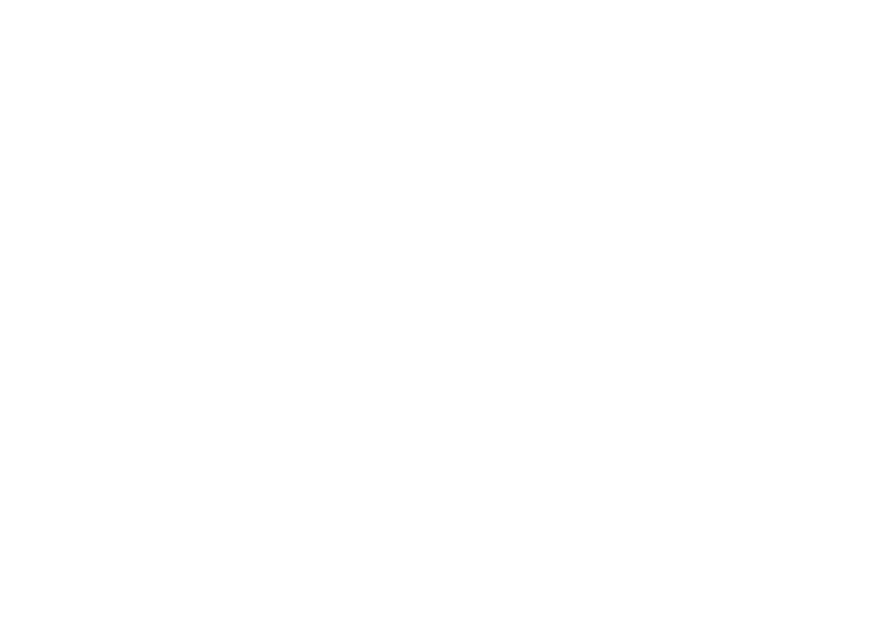

<IPython.core.display.Javascript object>


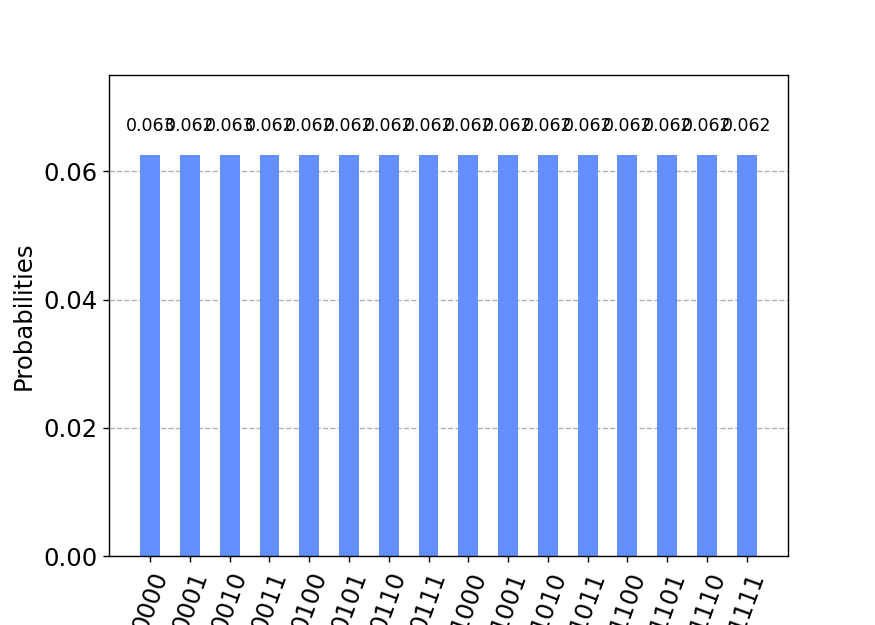

In [57]:
# Let's get the result:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()

final_state = result.get_statevector()
#print(final_state)
plot_histogram(result.get_counts())

In [67]:
import time
import tracemalloc

In [68]:
def binary_search(arr, l, r, p):
    m = (r+l)//2
    
    if l == r:
        return min(m, len(arr)-1)
    
    if arr[m] > p:
        return binary_search(arr, l, m, p)
    else:
        return binary_search(arr, m+1, r, p)

In [72]:
MO_time = []
MO_RAM = []
for M in range(2,4):
    t0 = time.time()
    tracemalloc.start()
    
    C1 = MO_Circuit(str(M**2)+'_bits.txt')
    C1.simulate()

    state = C1.measure()
    basis = []
    F = [] # Cumulative distribution
    
    N = int(np.log2(len(state)))
    eps = 1e-6

    for i in range(N**2):
        if abs(state[i]) > eps:
            basis.append(('{0:0>' + str(int(N)) + r'b}').format(i))
            F.append(sum(F)+state[i])

    hist = {}
    for i in range(NumBitSrings):
        p = np.random.uniform(0, 1)
        q = binary_search(F, 0, len(F), p)
        res = basis[q]
        try:
            hist[res] += 1
        except KeyError:
            hist[res] = 1
    
    current, peak = tracemalloc.get_traced_memory()
    current, peak = current/10**6, peak/10**6
    t1 = time.time()
    tracemalloc.stop()
    
    MO_time.append(t1-t0)
    MO_RAM.append(peak)

In [76]:
SV_time = []
SV_RAM = []
for M in range(2,5):
    t0 = time.time()
    tracemalloc.start()
    
    C2 = SV_Circuit(str(M**2)+'_bits.txt')
    C2.simulate()

    state = C2.measure()
    basis = []
    F = [] # Cumulative distribution
    
    N = int(np.log2(len(state)))
    eps = 1e-6

    for i in range(N**2):
        if abs(state[i]) > eps:
            basis.append(('{0:0>' + str(int(N)) + r'b}').format(i))
            F.append(sum(F)+state[i])

    hist = {}
    for i in range(NumBitSrings):
        p = np.random.uniform(0, 1)
        q = binary_search(F, 0, len(F), p)
        res = basis[q]
        try:
            hist[res] += 1
        except KeyError:
            hist[res] = 1
            
    current, peak = tracemalloc.get_traced_memory()
    current, peak = current/10**6, peak/10**6
    
    t1 = time.time()
    tracemalloc.stop()
    SV_time.append(t1-t0)
    SV_RAM.append(peak)

In [78]:
tab_time = []
tab_RAM = []
for M in range(2,5):
    t0 = time.time()
    tracemalloc.start()
    
    hist = {}

    for i in range(NumBitSrings):
        C3 = Tableau_Circuit(str(M**2)+'_bits.txt')
        C3.simulate()
        res = np.array2string(C3.measure_system(), separator='')[1:-1]

        try:
            hist[res] += 1
        except KeyError:
            hist[res] = 1
    
    current, peak = tracemalloc.get_traced_memory()
    current, peak = current/10**6, peak/10**6
    tracemalloc.stop()
    
    t1 = time.time()
    tab_time.append(t1-t0)
    tab_RAM.append(peak)

In [79]:
GS_time = []
GS_RAM = []
for M in range(2,6):
    t0 = time.time()
    tracemalloc.start()

    hist = {}

    for i in range(NumBitSrings):
        C4 = GS_Circuit(str(M**2)+'_bits.txt')
        C4.simulate()
        res = np.array2string(C4.measure_system(), separator='')[1:-1]

        try:
            hist[res] += 1
        except KeyError:
            hist[res] = 1
    
    current, peak = tracemalloc.get_traced_memory()
    current, peak = current/10**6, peak/10**6
    tracemalloc.stop()
    
    t1 = time.time()
    GS_time.append(t1-t0)
    GS_RAM.append(peak)

<IPython.core.display.Javascript object>


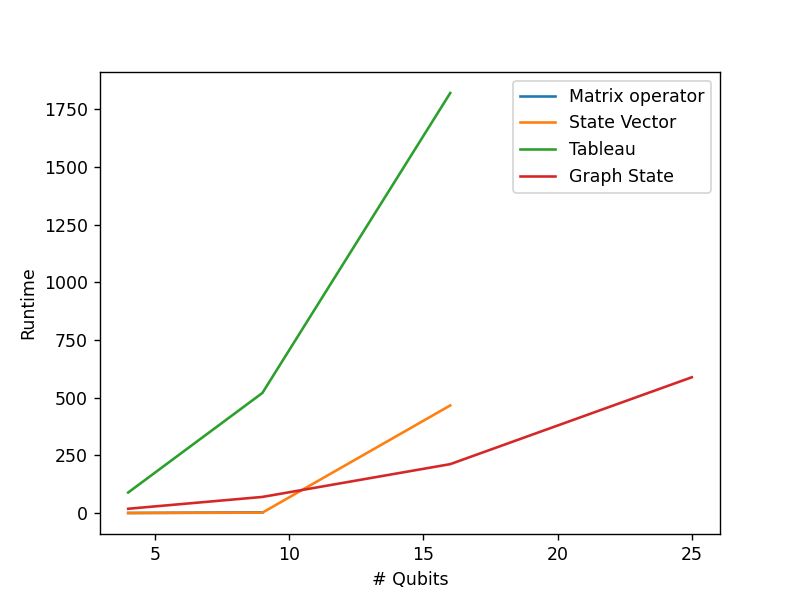

<IPython.core.display.Javascript object>


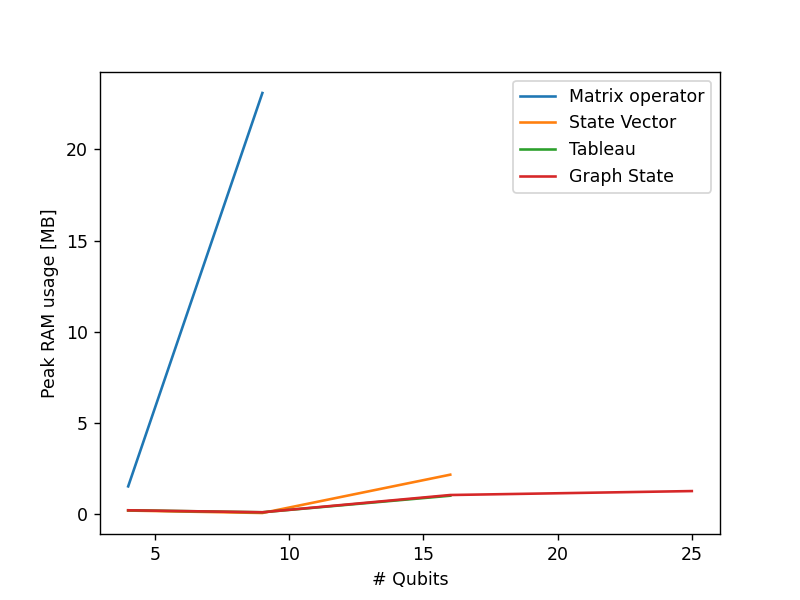

In [81]:
%matplotlib notebook

MO_bits = np.arange(2,4)**2
SV_bits = np.arange(2,5)**2
tab_bits = np.arange(2,5)**2
GS_bits = np.arange(2,6)**2

plt.figure()
plt.plot(MO_bits, MO_time, label='Matrix operator')
plt.plot(SV_bits, SV_time, label='State Vector')
plt.plot(tab_bits, tab_time, label='Tableau')
plt.plot(GS_bits, GS_time, label='Graph State')
plt.xlabel('# Qubits')
plt.ylabel('Runtime')
plt.legend()
plt.show()


plt.figure()
plt.plot(MO_bits, MO_RAM, label='Matrix operator')
plt.plot(SV_bits, SV_RAM, label='State Vector')
plt.plot(tab_bits, tab_RAM, label='Tableau')
plt.plot(GS_bits, GS_RAM, label='Graph State')
plt.xlabel('# Qubits')
plt.ylabel('Peak RAM usage [MB]')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


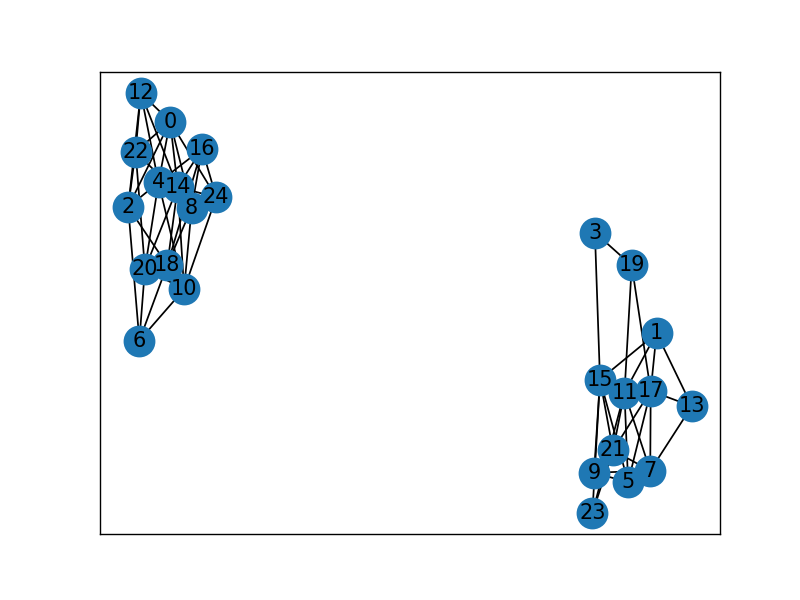

In [3]:
%matplotlib notebook
Circ = GS_Circuit('25_bits.txt')
Circ.simulate()
Circ.visualise_graph()

3
